In [1]:
# only calculate strucutre factors for specific q* critical wavevectors

### procedure: 
- find q*, 
- represent phases of interest in terms of q*
- evaluate gammas at q*,
- minimize wrt amplitude, 
- compare 

# Vertex (Greens functions)

In [1]:
import sys
sys.path.append("./vertex_subroutines")
from GAMcalc import *  # Code for calculating vertex functions
import propagator  # propagator object used to store pre-calculated values
import wignerD as wd # wigner D object used to store pre-calculated values

In [2]:
N = 1 # Number of Khun lengths

pset=propagator.prop_set(nlam=10) # nlam sepcifies number of angular eigenvalues
wigset = wd.wigner_d_vals()

In [91]:
%%time
# 1 hr 2 minutes runtime
fa_array = np.array([0.5])#np.arange(0.3, 0.51, .02)
chi_array = np.array([5, 7, 10, 12, 15, 17, 20])
cyl_pnts = np.array([])
lam_pnts = np.array([])
dis_pnts = np.array([])

for FA in fa_array:
    KS = spinodal(pset, N, FA)
    q_star = KS[0]
    print("q*: ", q_star)
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])

    lam_q = q_star*np.array([1, 0, 0])
    lam_g3 = 0
    cyl_g3 = 2/(3*(np.sqrt(3))) * gamma3(pset, N, FA, cyl_qs)
    print("cyl_g3: ", cyl_g3)
    lam_g4 = gamma4(pset, wigset, N, FA, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    print("lam_g4: ", lam_g4)
    cyl_g4 = (1/12)* (gamma4(pset, wigset, N, FA, np.array([cyl_q1 , -cyl_q1 , cyl_q1 , -cyl_q1 ])) + \
              4*gamma4(pset, wigset, N, FA, np.array([cyl_q1, -cyl_q1, q_star*np.array([-.5, .5*np.sqrt(3), 0]), -q_star*np.array([-.5, .5*np.sqrt(3), 0])])))
    print("cyl_g4: ", cyl_g4)
    for CHI in chi_array:
        lam_g2 = 0.5 * gamma2(pset, N, FA, q_star, CHI)
        print("lam_g2: ", lam_g2)
        cyl_g2 = 0.5 * (1/(3*np.sqrt(3))) * 3 * gamma2(pset, N, FA, q_star, CHI)
        print("cyl_g2: ", cyl_g2)
        amp_l = optimize.fmin(lambda amp: np.real(amp**2 * lam_g2 + amp**3 * lam_g3 + amp**4 * lam_g4), 1,\
                      disp=False)
        amp_c = optimize.fmin(lambda amp: np.real(amp**2 * cyl_g2 + amp**3 * cyl_g3 + amp**4 * cyl_g4), 1,\
                      disp=False)
        lamF = amp_l**2 * lam_g2 + amp_l**3 * lam_g3 + amp_l**4 * lam_g4
        cylF = amp_c**2 * cyl_g2 + amp_c**3 * cyl_g3 + amp_c**4 * cyl_g4
        
        point = np.array([FA, CHI])
        if (lamF > 0 and cylF > 0):
            #disordered stable
            dis_pnts = np.append(dis_pnts, point)
        elif (lamF < cylF):
            lam_pnts = np.append(lam_pnts, point) 
        else:
            cyl_pnts = np.append(cyl_pnts, point)
    print("one FA done!!")
            

q*:  8.228370457340418


./vertex_subroutines\MultiPoint.py:206: RuntimeWarning: invalid value encountered in cdouble_scalars
  if abs(out/(sum2+tol))<tol and l2>max(lam0_2,lam_2):
./vertex_subroutines\MultiPoint.py:209: RuntimeWarning: invalid value encountered in cdouble_scalars
  if abs(sum2/(sum1+tol))<tol and l1>max(lam0_1,lam_1):


cyl_g3:  -6.072654079766974e-31j
lam_g4:  (112.68760347653914-1.244628099755402e-12j)
cyl_g4:  (51.297018961071444+0.34553925945140557j)
lam_g2:  (1.3434023915888673+1.6646282634082058e-15j)
cyl_g2:  (0.7756137324138196+9.610735759793868e-16j)
lam_g2:  (-0.6565976084111327+1.6646282634082058e-15j)
cyl_g2:  (-0.37908680596543193+9.610735759793868e-16j)
lam_g2:  (-3.6565976084111327+1.6646282634082058e-15j)
cyl_g2:  (-2.111137613534309+9.610735759793868e-16j)
lam_g2:  (-5.656597608411133+1.6646282634082058e-15j)
cyl_g2:  (-3.2658381519135604+9.610735759793868e-16j)
lam_g2:  (-8.656597608411133+1.6646282634082058e-15j)
cyl_g2:  (-4.997888959482438+9.610735759793868e-16j)
lam_g2:  (-10.656597608411133+1.6646282634082058e-15j)
cyl_g2:  (-6.1525894978616895+9.610735759793868e-16j)
lam_g2:  (-13.656597608411133+1.6646282634082058e-15j)
cyl_g2:  (-7.884640305430566+9.610735759793868e-16j)
one FA done!!
Wall time: 5min 12s


In [6]:
%%time
f_as = fa_array = np.arange(0.3, 0.505, .01)#np.arange(0.1, 1, 0.1)
spin_array_vertex = np.zeros(len(f_as))
for i, FA in enumerate(f_as):
    chis = np.arange(6, 10, 0.1) #np.arange(0, 40, 0.1) 
    min_G_vals = np.zeros(len(chis))
    for j,CHI in enumerate(chis):
        #evaluate gamma2 at the chi k_spinodal for appropriate length, find when equals zero
        KS = spinodal(pset, N, FA)
        G = gamma2(pset, N, FA, KS, CHI)
        min_G_vals[j] = G # b/c g2 is 1x1 matrix, eigenvalue is the value of g2 itself. 
    spin_array_vertex[i] = chis[np.argmin((abs(min_G_vals)))]

<timed exec>:10: ComplexWarning: Casting complex values to real discards the imaginary part


Wall time: 1min 4s


Text(0.5, 0, '$f_A$')

<Figure size 432x288 with 0 Axes>

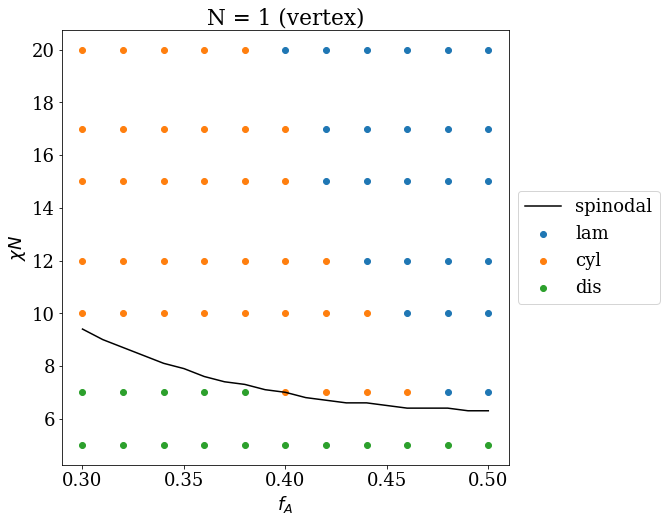

In [7]:
fig = plt.figure()
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.plot(f_as, spin_array_vertex, label="spinodal", color = "black")#, zorder = 0)
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl")
ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis")


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("N = 1 (vertex)")
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$f_A$")

# Chain growth algorithm

In [176]:
import importlib
from cga import *

In [175]:
#from cga import *
#import cga
importlib.reload(cga)

<module 'cga' from 'C:\\Users\\Thomas\\Desktop\\structure_factor\\structure_factor\\cga.py'>

In [166]:
%%time
N = 1
FA = 0.5
n_p = 15
n_b = 20#0
vec_otpt = wlc_cga_vect(N, n_p, n_b, FA, num_snapshots=10000)#00)

Wall time: 8.21 s


In [13]:
%%time
n_p = 15
n_b = 20#0
it_otpt = wlc_cga(n_p, n_b, FA, num_snapshots=10000)

Wall time: 40.8 s


In [167]:
%%time
get_sf2_vect(n_p, n_b, vec_otpt, [1, 0, 0])

TypeError: get_sf2_vect() missing 2 required positional arguments: 'FA' and 'N'

In [168]:
%%time
get_sf2_vect(n_p, n_b, vec_otpt, [1, 0, 0], 0.5, 1)
#200 beads

Wall time: 3.16 s


array([[0.24858293+0.00000000e+00j, 0.24191549+3.48909522e-05j],
       [0.24191549+3.48909522e-05j, 0.24857826+0.00000000e+00j]])

In [11]:
s2wlc(pset, N, FA, K=1, sequence='all')

array([[0.24856624-1.13518027e-19j, 0.24179697+5.85906301e-19j],
       [0.24179697+5.85906301e-19j, 0.24856624-1.13518027e-19j]])

In [206]:
%%time
get_sf2(n_p, n_b, it_otpt, [1, 0, 0])

Wall time: 26 s


array([[[0.24998312+0.0000000e+00j],
        [0.24988366-2.5887499e-05j]],

       [[0.24988366-2.5887499e-05j],
        [0.24998316+0.0000000e+00j]]])

In [ ]:
%%time
N = 1 #length in kuhn lengths
n_p = 15
n_b = 20#0
fa_array = np.arange(0.3, 0.51, .02)
chi_array = np.array([5, 7, 10, 12, 15, 17, 20])
cyl_pnts_cga = np.array([])
lam_pnts_cga = np.array([])
dis_pnts_cga = np.array([])


for FA in fa_array:
    otpt = wlc_cga_vect(N, n_p, n_b, FA, num_snapshots=10000)
    otpt_s2_spn = wlc_cga_vect(N, n_p, n_b, FA, num_snapshots=1000)
    KS = spin(n_p, n_b, otpt_s2_spn, N, FA)
    q_star = KS[0]
    #print("q*: ", q_star)
    
    #KS = spinodal(pset, N, FA)
    #q_star = KS[0]
    
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])

    lam_q = q_star*np.array([1, 0, 0])
    lam_g3 = 0
    cyl_g3 = 2/(3*(np.sqrt(3))) * gam3(n_p, n_b, otpt, N, cyl_qs, FA)
    #print("cyl_g3: ", cyl_g3)
    lam_g4 = gam4(n_p, n_b, otpt, N, np.array([lam_q, -lam_q, lam_q, -lam_q]), FA)
    #print("lam_g4: ", lam_g4)
    cyl_g4 = (1/12)* (gam4(n_p, n_b, otpt, N, np.array([cyl_q1 , -cyl_q1 , cyl_q1 , -cyl_q1 ]), FA) + \
              4*gam4(n_p, n_b, otpt, N, np.array([cyl_q1, -cyl_q1, q_star*np.array([-.5, .5*np.sqrt(3), 0]), -q_star*np.array([-.5, .5*np.sqrt(3), 0])]), FA))
    for CHI in chi_array:
        lam_g2 = 0.5 * gam2(n_p, n_b, otpt_s2_spn, N, lam_q, CHI, FA)
        #print("lam_g2: ", lam_g2)
        cyl_g2 = 0.5 * (1/(3*np.sqrt(3))) * 3 * gam2(n_p, n_b, otpt_s2_spn, N, cyl_q1, CHI, FA)
        #print("cyl_g2: ", cyl_g2)
        amp_l = optimize.fmin(lambda amp: np.real(amp**2 * lam_g2 + amp**3 * lam_g3 + amp**4 * lam_g4), 1,\
                      disp=False)
        amp_c = optimize.fmin(lambda amp: np.real(amp**2 * cyl_g2 + amp**3 * cyl_g3 + amp**4 * cyl_g4), 1,\
                      disp=False)
        lamF = amp_l**2 * lam_g2 + amp_l**3 * lam_g3 + amp_l**4 * lam_g4
        cylF = amp_c**2 * cyl_g2 + amp_c**3 * cyl_g3 + amp_c**4 * cyl_g4
        
        point = np.array([FA, CHI])
        if (lamF > 0 and cylF > 0):
            #disordered stable
            dis_pnts_cga = np.append(dis_pnts_cga, point)
        elif (lamF < cylF):
            lam_pnts_cga = np.append(lam_pnts_cga, point) 
        else:
            cyl_pnts_cga = np.append(cyl_pnts_cga, point)
    print("one FA done!!")
            

one FA done!!
one FA done!!


In [138]:
lam_pnts_cga

array([ 0.5,  5. ,  0.5,  7. ,  0.5, 10. ,  0.5, 12. ,  0.5, 15. ,  0.5,
       17. ,  0.5, 20. ])

In [139]:
cyl_pnts_cga

array([], dtype=float64)

In [140]:
dis_pnts_cga

array([], dtype=float64)

Text(0.5, 0, '$f_A$')

<Figure size 432x288 with 0 Axes>

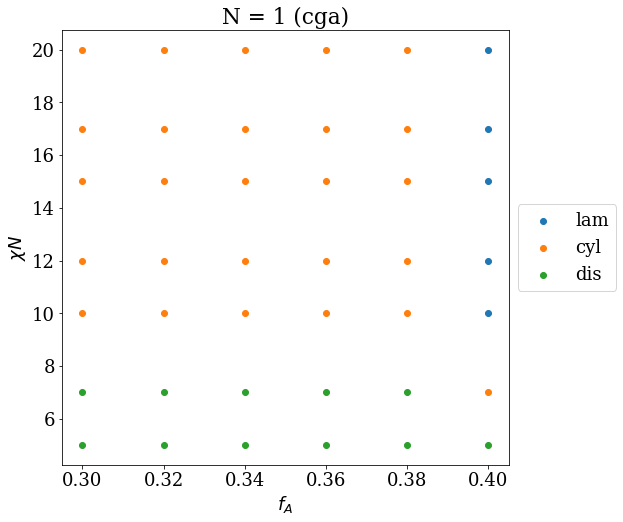

In [146]:
fig = plt.figure()
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


#ax.plot(f_as, spin_array_vertex, label="spinodal", color = "black")#, zorder = 0)
ax.scatter(lam_pnts_cga[::2], lam_pnts_cga[1::2], label = "lam")
ax.scatter(cyl_pnts_cga[::2], cyl_pnts_cga[1::2], label = "cyl")
ax.scatter(dis_pnts_cga[::2], dis_pnts_cga[1::2], label = "dis")


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("N = 1 (cga)")
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$f_A$")

In [178]:
%%time
#cga
for FA in [0.5]:#fa_array:
    otpt = wlc_cga_vect(n_p, n_b, FA, num_snapshots=1000)
    print("got chains")
    KS = spin(n_p, n_b, otpt, N)
    q_star = KS[0]
    print("q_star from cga: ", q_star)
    q_star = 8.228370457340418
    
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
    #KS = spinodal(pset, N, FA)
    #q_star = KS[0]
    
    s3cga = get_sf3(n_p, n_b, otpt, cyl_qs)
    
    print("q*: ", q_star)
    print(s3cga)
    
    
    #vv =gam2(n_p, n_b, otpt, N, np.array([q_star, 0, 0]), CHI)
    #print(vv)
    
# spin taking so long! w initial guess = 1, takes 3 mins 10 sec

got chains
q_star from cga:  70.26931054687495


TypeError: 'float' object cannot be interpreted as an integer

In [112]:
%%time

otpt = wlc_cga(n_p, n_b, FA, num_snapshots=10000)

Wall time: 56.5 s


In [ ]:
#work on sf2 and spin function (now wrong value)

In [170]:
%%time
#cga
KS = spin(n_p, n_b, vec_otpt, N, FA)
#iterative- 3min 3 sec
#vec 1 = 25.5s

Wall time: 1min 25s


In [171]:
KS

array([8.28740234])

In [197]:
%%time
#vertex
KS = spinodal(pset, N, FA)

Wall time: 62.5 ms


In [199]:
FA

0.5

In [198]:
KS

array([8.22837046])

In [191]:
%%time
CHI = 0
gam2(n_p, n_b, vec_otpt, N, lam_q, CHI)

Wall time: 9.97 s


array([12.22578797-0.01758502j])

In [192]:
%%time
get_sf2_vect(n_p, n_b, vec_otpt, [1, 0, 0])

Wall time: 9.63 s


array([[[0.24998307+0.00000000e+00j],
        [0.24988331-2.02345706e-05j]],

       [[0.24988331-2.02345706e-05j],
        [0.2499831 +0.00000000e+00j]]])

In [186]:
%%time
gamma2(pset, N, FA, KS, CHI)

Wall time: 0 ns


(12.686804783177735+3.3292565268164116e-15j)

In [116]:
%%time
get_sf2(n_p, n_b, otpt, lam_q)

Wall time: 33.6 s


array([[[0.18429394+0.j        ],
        [0.02101258+0.00076402j]],

       [[0.02101258+0.00076402j],
        [0.18432439+0.j        ]]])

In [99]:
for FA in [0.5]:#fa_array:
    KS = spinodal(pset, N, FA)
    q_star = KS[0]
    print("q*: ", q_star)
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
    
    s3 = s3wlc(pset, N, FA, cyl_qs)
    #vvv = gamma3(pset, N, FA, cyl_qs)
    print(s3)

q*:  8.228370457340418
[[[0.06927967-5.81997339e-17j 0.00119319+1.46865919e-17j]
  [0.00119319+1.46865919e-17j 0.00119319+1.46865919e-17j]]

 [[0.00119319+1.46865919e-17j 0.00119319+1.46865919e-17j]
  [0.00119319+1.46865919e-17j 0.06927967-5.81997339e-17j]]]


In [ ]:
#compare s3 bw cga and vertex

In [ ]:
FA

In [66]:
q_star = 8.22837046
cyl_q1 = q_star*np.array([1, 0, 0])
cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])

s3 = s3wlc(pset, N, FA, cyl_qs)
s3

array([[[0.06927967-7.91230457e-18j, 0.00119319+1.90675352e-17j],
        [0.00119319+1.90675352e-17j, 0.00119319+1.90675352e-17j]],

       [[0.00119319+1.90675352e-17j, 0.00119319+1.90675352e-17j],
        [0.00119319+1.90675352e-17j, 0.06927967-7.91230457e-18j]]])

In [68]:

get_sf3(n_p, n_b, it_otpt, cyl_qs)

array([[[array([0.64859553+3.92485434e-07j]), array([0.+0.j])],
        [array([0.+0.j]), array([0.+0.j])]],

       [[array([0.+0.j]), array([0.+0.j])],
        [array([0.+0.j]), array([0.324498-5.04404724e-07j])]]],
      dtype=object)

In [73]:
get_sf3_vect(n_p, n_b, vec_otpt, cyl_qs)

array([[[array([0.06972015-3.91921524e-06j]),
         array([0.00162481-0.00017692j])],
        [array([0.00162481-0.00017692j]),
         array([0.00160071+5.01065529e-05j])]],

       [[array([0.00162481-0.00017692j]),
         array([0.00160071+5.01065529e-05j])],
        [array([0.00160071+5.01065529e-05j]),
         array([0.06972008+8.39576466e-06j])]]], dtype=object)

In [76]:
get_sf4_vect(n_p, n_b, vec_otpt, cyl_qs)

ValueError: not enough values to unpack (expected 4, got 3)

In [ ]:
lam_g4 = gam4(n_p, n_b, otpt, N, np.array([lam_q, -lam_q, lam_q, -lam_q]))

In [ ]:
#fix gam3 and gam4 !! try high num snapshots

#vectorize snapshots- grow all chains FOR ALL SNAPSHOTS simultaneously